In [1]:
# using Revise
using MPSTime
using JLD2
using Distributed
using Optimization
# using OptimizationBBO
using Random
using StatsBase
using Plots

In [3]:

# using OptimizationMetaheuristics
# using OptimizationOptimJL
# using OptimizationNLopt
# using OptimizationOptimisers
# inst = parse(Int, ARGS[1])

Random.seed!(1)

params = (
    eta=(-3,log10(0.5)), 
    d=(5,15), 
    chi_max=(20,40)
) 
inst = 1


@load "kepler_windows_julia_idx_bck.jld2" windows_per_percentage
# windows_julia = windows_per_percentage
eval_windows = reduce(vcat, values(windows_per_percentage))


rs_f = jldopen("c4_folds_per_inst.jld2", "r");
    folds = read(rs_f, "folds")[inst];
    Xs = read(rs_f, "Xs_per_inst")[inst];
close(rs_f)
ys = ones(Int, size(Xs, 1));

tr_inds, te_inds = folds[1]
X_train, X_test = Xs[tr_inds,:], Xs[te_inds,:]



([2.99002455339537e-6 8.60607329732366e-5 … -1.94887499349594e-5 -1.85129663039518e-5; -1.81322881454005e-5 -2.16414987321834e-5 … -3.90373906777874e-5 -3.96271935294568e-5; … ; 2.36125826407196e-5 -1.38935959421715e-5 … 1.48851850029219e-5 -7.27032843395037e-6; 2.68257887853229e-5 -4.62341117346554e-6 … -2.44459908285144e-5 -1.57729236096582e-5], [-5.5014499866779e-6 -4.53792799759434e-6 … -1.58629023558343e-5 2.19382159724058e-5; 5.01632885567815e-5 -4.31655819177479e-6 … 1.02909153374409e-5 1.67050048514028e-5])

In [4]:
X_train

41×100 Matrix{Float64}:
  2.99002e-6   8.60607e-5  -3.9232e-5   …  -1.94887e-5  -1.8513e-5
 -1.81323e-5  -2.16415e-5  -2.16415e-5     -3.90374e-5  -3.96272e-5
 -2.69369e-5  -1.34431e-5  -1.34431e-5     -9.69982e-7  -7.19455e-5
 -4.99539e-6  -2.88248e-5  -4.79067e-6     -1.5179e-5   -8.97818e-6
  9.74413e-6  -2.21187e-5  -9.72748e-7      7.68383e-6  -1.761e-5
 -9.00526e-6  -1.81976e-5   1.00359e-6  …  -3.54804e-6   5.79597e-7
  4.26712e-5  -2.41644e-5   7.37677e-6      2.51709e-5   2.70258e-6
 -1.08978e-5   3.06224e-5  -1.13948e-5     -1.79548e-5  -2.27946e-5
 -1.93102e-5  -1.22096e-5  -6.10986e-5      1.37964e-5  -6.79975e-6
 -3.76655e-6  -1.26888e-5  -1.03876e-5      2.50467e-5  -1.97492e-5
  ⋮                                     ⋱               
  2.19143e-5  -2.70785e-5   2.779e-5        2.79592e-6   1.81173e-5
 -6.91445e-5  -3.07786e-5   3.01457e-5      1.40525e-5  -5.05485e-5
  4.34599e-5   1.08004e-5   4.35021e-5      2.34971e-5  -4.1341e-6
 -1.35994e-5   3.04517e-6  -9.21791e-6 

In [5]:
@load "KC4_rand_250_ns.jld2" res
res_r250_c4 = copy(res) |> values |> collect

┌ Warning: saved type MPSOptions is missing field svd_alg in workspace type; reconstructing
└ @ JLD2 /home/noodles/.julia/packages/JLD2/OP0XX/src/data/reconstructing_datatypes.jl:195


30-element Vector{Any}:
 Dict{String, Any}("eval_windows" => [[39, 40, 41, 42, 43], [8, 9, 10, 11, 12], [83, 84, 85, 86, 87], [11, 12, 13, 14, 15], [65, 66, 67, 68, 69], [16, 17, 18, 19, 20], [6, 7, 8, 9, 10], [69, 70, 71, 72, 73], [34, 35, 36, 37, 38], [12, 13, 14, 15, 16]  …  [6, 7, 8, 9, 10, 11, 12, 13, 14, 15  …  81, 82, 83, 84, 85, 86, 87, 88, 89, 90], [13, 14, 15, 16, 17, 18, 19, 20, 21, 22  …  88, 89, 90, 91, 92, 93, 94, 95, 96, 97], [15, 16, 17, 18, 19, 20, 21, 22, 23, 24  …  90, 91, 92, 93, 94, 95, 96, 97, 98, 99], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16  …  82, 83, 84, 85, 86, 87, 88, 89, 90, 91], [10, 11, 12, 13, 14, 15, 16, 17, 18, 19  …  85, 86, 87, 88, 89, 90, 91, 92, 93, 94], [2, 3, 4, 5, 6, 7, 8, 9, 10, 11  …  87, 88, 89, 90, 91, 92, 93, 94, 95, 96], [5, 6, 7, 8, 9, 10, 11, 12, 13, 14  …  90, 91, 92, 93, 94, 95, 96, 97, 98, 99], [4, 5, 6, 7, 8, 9, 10, 11, 12, 13  …  89, 90, 91, 92, 93, 94, 95, 96, 97, 98], [3, 4, 5, 6, 7, 8, 9, 10, 11, 12  …  88, 89, 90, 91, 92, 93, 94, 95

In [6]:
println("d: ",res[1]["opts"].d, "\nChi_max: ",res[1]["opts"].chi_max, "\neta: ",res[1]["opts"].eta)

d: 5
Chi_max: 20
eta: 0.0019618210858353864


In [7]:
opts_re = res[1]["opts"]
properties = propertynames(opts_re)

opts = MPSOptions(; [field => getproperty(opts_re,field) for field in properties]...)
mps, _... = fitMPS(X_train, opts);

In [8]:
imp = init_imputation_problem(mps, X_test; verbosity=-10);

loss = MPSTime.eval_loss(ImputationLoss(), mps, X_test, [0,0], eval_windows) 
    # push!(nn_mae_c6,Dict([("eval_windows", eval_windows), ("loss", nn)])])

140-element Vector{Float64}:
 2.4260613272943416e-5
 2.5177210014319798e-5
 2.3503574677973884e-5
 2.647741227143396e-5
 2.2986578062343015e-5
 2.6128785222867327e-5
 2.3690883579201015e-5
 2.6718905291391842e-5
 2.418217365808954e-5
 2.370812946894417e-5
 ⋮
 2.7674059682188356e-5
 2.840978896376926e-5
 1.8692494859596036e-5
 1.5601428603260994e-5
 1.9247227061886695e-5
 3.1079149579413504e-5
 1.5953569835514984e-5
 2.499557636924008e-5
 2.4887779428870818e-5

1-element Vector{Any}:
 Dict(:MAE => 2.09875665742887e-5, :MAPE => 7.387924768793577, :NN_MAE => 4.464785516595795e-5, :NN_MAPE => 31.138582772535624)

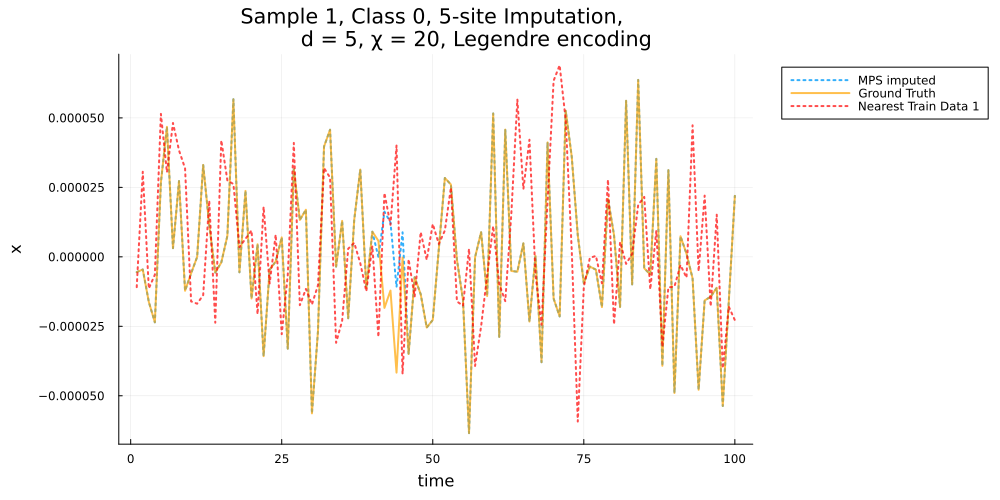

In [24]:
impute_sites = eval_windows[139]
method=:median
class = 0
inst = 1
imputed, errs, targets, stats, plots = MPS_impute(imp, class, inst, impute_sites, method; NN_baseline=true, plot_fits=true)

display(stats)
plot(plots...)

1-element Vector{Any}:
 Dict(:MAE => 2.4036827940829253e-5, :MAPE => 7.025527848550078, :NN_MAE => 3.41189418807294e-5, :NN_MAPE => 17.94847686578108)

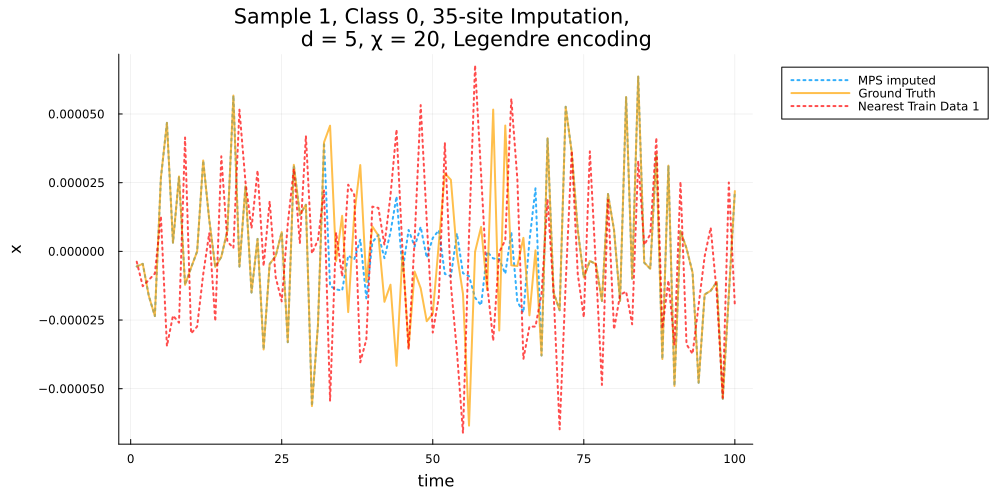

In [25]:
impute_sites = eval_windows[120]
method=:median
class = 0
inst = 1
imputed, errs, targets, stats, plots = MPS_impute(imp, class, inst, impute_sites, method; NN_baseline=true, plot_fits=true)

display(stats)
plot(plots...)

In [10]:
res_r250_c4[10]

Dict{String, Any} with 13 entries:
  "eval_windows"   => [[39, 40, 41, 42, 43], [8, 9, 10, 11, 12], [83, 84, 85, 8…
  "cache"          => Dict((21, 5, 0.00233633)=>2.45235e-5, (34, 9, 0.487675)=>…
  "time"           => 122615.0
  "tuning_pms"     => [0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.…
  "objective"      => "ImputationLoss()"
  "train_inds"     => [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  32, 33, 34, 35, 36, 37…
  "optimiser"      => "MPSRandomSearch(:LatinHypercube)"
  "loss"           => [1.54551e-5, 2.23755e-5, 2.99323e-5, 1.1924e-5, 3.193e-5,…
  "eval_pms"       => nothing
  "opts"           => Reconstruct@MPSOptions(Any[-5, 10, 20, 0.0019618210858353…
  "fold"           => 1
  "test_inds"      => [42, 43]
  "tuning_windows" => nothing

In [69]:
res_r250_c4[10]["loss"]

140-element Vector{Float64}:
 1.545514776878878e-5
 2.2375546617413972e-5
 2.9932316799695625e-5
 1.1924032213773417e-5
 3.192995977154582e-5
 2.9291849737955494e-5
 2.7674059682188356e-5
 2.840978896376926e-5
 1.8692494859596036e-5
 1.5601428603260994e-5
 ⋮
 2.5705114733669036e-5
 2.3537605628354597e-5
 2.3860025673384434e-5
 2.4889665357288408e-5
 2.4775821762343773e-5
 2.3982860846376938e-5
 2.4517110550425404e-5
 2.4663385250873477e-5
 2.4074864223381298e-5

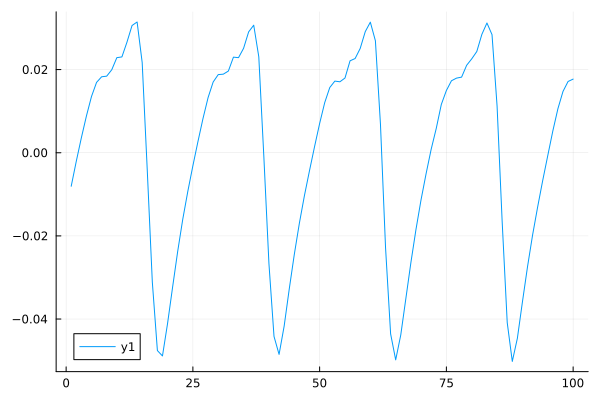

In [79]:
plot(X_train[1,:])